In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yt
from field_definitions import _nuclei_density, _electron_density
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from astropy import units as u, constants  as const

pc = const.pc.cgs.value
kB  = const.k_B.cgs.value
Msun = const.M_sun.cgs.value
G = const.G.cgs.value
Myr = u.Myr.in_units("s")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble" : r'\boldmath'
})

<ipython-input-1-ef4fae5c924f>:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [2]:
default_file = "SILCC_hdf5_plt_cnt_1080"

# radius of the bubble and center
radius=100
# c = ([-80, -150, 0], "pc") # only new version of YT
c = [-80*pc, -150*pc, 0*pc]

In [8]:
cum_vol = {}
cum_lum = {}
for table in ["cloudy", "apec"]:
    ds = yt.load("sim-files/SILCC_hdf5_plt_cnt_1080")
    # register data fields
    ds.add_field(('gas', 'H_nuclei_density'), _nuclei_density, sampling_type="local", units="cm**(-3)", force_override=True)
    ds.add_field(('gas', 'El_number_density'), _nuclei_density, sampling_type="local", units="cm**(-3)", force_override=True)    
    ds.add_field(('gas', 'electron_density'), _electron_density, sampling_type="local", units="g*cm**(-3)", force_override=True)

    yt.add_xray_emissivity_field(ds, 0.1, 2, metallicity=1.0, \
                                 data_dir="/Users/girichidis/Physics/Tables/yt-python/", table_type=table)

    sphere = ds.sphere(c, (radius, "pc"))
    x_lum = sphere[('gas', 'xray_luminosity_0.1_2_keV')]
    vol = sphere[('gas', 'cell_volume')]

    idx = np.argsort(x_lum)
yt-pro
        print(frac, cv[idx])
    cum_vol[table] = cv
    cum_lum[table] = cl

yt : [INFO     ] 2025-02-21 11:14:20,386 Parameters: current_time              = 340597785179995.1
yt : [INFO     ] 2025-02-21 11:14:20,387 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2025-02-21 11:14:20,388 Parameters: domain_left_edge          = [-7.715e+20 -7.715e+20 -7.715e+20]
yt : [INFO     ] 2025-02-21 11:14:20,389 Parameters: domain_right_edge         = [7.715e+20 7.715e+20 7.715e+20]
yt : [INFO     ] 2025-02-21 11:14:20,390 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-02-21 11:14:28,966 Loading emissivity data from /Users/girichidis/Physics/Tables/yt-python/cloudy_emissivity_v2.h5
yt : [INFO     ] 2025-02-21 11:14:28,969 X-ray emissivity data calculated with Cloudy 13 rc1 on 12/10/2012 by Britton Smith.
yt : [INFO     ] 2025-02-21 11:14:28,970 X-ray 'cloudy' emissivity data version: 2.
yt : [INFO     ] 2025-02-21 11:14:28,980 Adding ('gas','xray_emissivity_0.1_2_keV') field.
yt : [INFO     ] 2025-02-21 11:14:28,980 Adding ('gas','xray_lu

0.6 0.002874711633686011 dimensionless
0.7 0.0037707516439071612 dimensionless
0.8 0.0051260427390393565 dimensionless
0.9 0.007898896262853648 dimensionless
0.95 0.013613847899161506 dimensionless
0.99 0.08566667356113652 dimensionless


yt : [INFO     ] 2025-02-21 11:14:37,144 Loading emissivity data from /Users/girichidis/Physics/Tables/yt-python/apec_emissivity_v3.h5
yt : [INFO     ] 2025-02-21 11:14:37,146 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2025-02-21 11:14:37,147 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2025-02-21 11:14:37,156 Adding ('gas','xray_emissivity_0.1_2_keV') field.
yt : [INFO     ] 2025-02-21 11:14:37,156 Adding ('gas','xray_luminosity_0.1_2_keV') field.
yt : [INFO     ] 2025-02-21 11:14:37,157 Adding ('gas','xray_photon_emissivity_0.1_2_keV') field.


0.6 0.002805768371544398 dimensionless
0.7 0.0036984724174683814 dimensionless
0.8 0.004955463764643818 dimensionless
0.9 0.007619342454749846 dimensionless
0.95 0.012961778077874148 dimensionless
0.99 0.07860755071065437 dimensionless


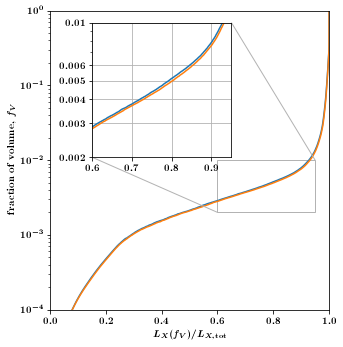

In [4]:
fig, ax = plt.subplots(figsize=(5, 5.5))
for table in ["cloudy", "apec"]:
    ax.semilogy(cum_lum[table], cum_vol[table])
ax.set_xlim(0, 1)
ax.set_ylim(1e-4, 1)
ax.set_xlabel('$L_X(f_V) / L_{X,\\mathrm{tot}}$')
ax.set_ylabel('\\textbf{fraction of volume, }$f_V$')
#ax.set_title('Sorted X-ray Luminosity vs Sorted Cell Volume')

ax2 = plt.axes([0.6,1e-3,0.95,1e-2])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.15,0.51,0.5,0.45])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax, ax2, loc1=1, loc2=3, fc="none", ec='0.7')
for table in ["cloudy", "apec"]:
    ax2.semilogy(cum_lum[table], cum_vol[table])
#ax2.semilogy(cum_lum, cum_vol)
ax2.set_xlim(0.6, 0.95)
ax2.set_ylim(2e-3, 1e-2)
ax2.set_yticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.01])
ax2.set_yticklabels(["$0.002$", "$0.003$", "$0.004$", "$0.005$", "$0.006$", "$0.01$"])
ax2.grid()

plt.savefig('plots/cumulative-vol-Lx.pdf', format='pdf', bbox_inches='tight')